# Machine Learning

In [2]:
# import librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
# create DataFrame
import sklearn.datasets as ds
dir(ds)
from sklearn.datasets import load_iris
li = load_iris()

df = pd.DataFrame(data=li.data, columns=li.feature_names)
df['species'] = li['target']

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# test train split 
# In case of DataFrame: drop output variable from DataFrame and have a separate variable for that
x = df.drop('species', axis = 'columns')
y = df['species']


# Feature Scaling: Scaling the variables between 0 and 1 
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 

# model = linear_model.LinearRegression()
# model.fit(x_train, y_train)
# y_predict = model.predict(x_test)

# K Fold Cross Validation

In [35]:
# Store model predictions
prediction_linear = []
prediction_l1_lasso_reg = []
prediction_l2_ridge_reg = []
prediction_logistic = []
prediction_decision_tree = []
prediction_svm = []
prediction_random_forest = []
prediction_gaussian_naive_bayes = []
prediction_multinomial_naive_bayes = []

# Store model scores
scores_linear = []
scores_l1_lasso_reg = []
scores_l2_ridge_reg = []
scores_logistic = []
scores_decision_tree = []
scores_svm = []
scores_random_forest = []
scores_gaussian_naive_bayes = []
scores_multinomial_naive_bayes = []

# make objects of the model
linear_object = linear_model.LinearRegression()
l1_lasso_reg_object = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
l2_ridge_reg_object = linear_model.Ridge(alpha=50, max_iter=100, tol=0.1)
logistic_object = LogisticRegression(solver='liblinear',multi_class='ovr')
decision_tree_object = tree.DecisionTreeClassifier()
svm_object = SVC(C=1, gamma=10, kernel='linear')
random_forest_object = RandomForestClassifier(n_estimators=20)
gaussian_naive_bayes_object = GaussianNB()
multinomial_naive_bayes_object = MultinomialNB()

In [36]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    return score

def get_prediction(model, x_test):
    y_predict = model.predict(x_test)
    return y_predict

folds = StratifiedKFold(n_splits=3)
for train_index, test_index in folds.split(li.data,li.target):

    x_train = li.data[train_index]
    x_test = li.data[test_index]
    y_train = li.target[train_index]
    y_test = li.target[test_index]
    
    scores_linear.append(get_score(linear_object,x_train, x_test, y_train, y_test))
    prediction_linear.append(get_prediction(linear_object, x_test))
    
    scores_l1_lasso_reg.append(get_score(l1_lasso_reg_object,x_train, x_test, y_train, y_test))
    prediction_l1_lasso_reg.append(get_prediction(l1_lasso_reg_object, x_test))
    
    scores_l2_ridge_reg.append(get_score(l2_ridge_reg_object,x_train, x_test, y_train, y_test))
    prediction_l2_ridge_reg.append(get_prediction(l2_ridge_reg_object, x_test))
    
    scores_logistic.append(get_score(logistic_object, x_train, x_test, y_train, y_test)) 
    prediction_logistic.append(get_prediction(logistic_object, x_test))

    scores_decision_tree.append(get_score(decision_tree_object, x_train, x_test, y_train, y_test))
    prediction_decision_tree.append(get_prediction(decision_tree_object, x_test))


    scores_svm.append(get_score(svm_object, x_train, x_test, y_train, y_test))
    prediction_svm.append(get_prediction(svm_object, x_test))

    scores_random_forest.append(get_score(random_forest_object, x_train, x_test, y_train, y_test))
    prediction_random_forest.append(get_prediction(random_forest_object, x_test))
    
    scores_gaussian_naive_bayes.append(get_score(gaussian_naive_bayes_object, x_train, x_test, y_train, y_test))
    prediction_gaussian_naive_bayes.append(get_prediction(gaussian_naive_bayes_object, x_test))
    
    scores_multinomial_naive_bayes.append(get_score(multinomial_naive_bayes_object, x_train, x_test, y_train, y_test))
    prediction_multinomial_naive_bayes.append(get_prediction(multinomial_naive_bayes_object, x_test))

print('Linear Regression Model score is: \n', scores_linear)
print('Lasso, L1 Regularization Model score is: \n', scores_l1_lasso_reg)
print('Ridge, L2 Regularization Model score is: \n', scores_l2_ridge_reg)
print('Logistic Regression Model score is: \n', scores_logistic)
print('Decision Tree Model score is: \n', scores_decision_tree)
print('Support Vector Machine Model score is: \n', scores_svm)
print('Random Forest Model score is: \n', scores_random_forest)
print('Gaussian Naive Bayes Model score is: \n', scores_gaussian_naive_bayes)
print('Multinomial Naive Bayes Model score is: \n', scores_multinomial_naive_bayes)

Linear Regression Model score is: 
 [0.9407089423425793, 0.9175266399145782, 0.9227749363050073]
Lasso, L1 Regularization Model score is: 
 [-0.0013644633110978521, 0.0, -0.0013644633110978521]
Ridge, L2 Regularization Model score is: 
 [0.8985451488023348, 0.8959852309411054, 0.8895050918427343]
Logistic Regression Model score is: 
 [0.96, 0.96, 0.94]
Decision Tree Model score is: 
 [0.98, 0.94, 0.98]
Support Vector Machine Model score is: 
 [1.0, 1.0, 0.98]
Random Forest Model score is: 
 [0.98, 0.94, 0.96]
Gaussian Naive Bayes Model score is: 
 [0.92, 0.94, 0.96]
Multinomial Naive Bayes Model score is: 
 [0.96, 0.92, 0.96]


In [37]:
# # Parameters to check in a model:

# # Linear Regression:
# print('Linear Regression Plot: \n')
# print(plt.scatter(y_test, prediction_linear[0]))
# print('Linear Regression Coefficient: \n', linear_object.coef_)
# print('Linear Regression Intercept: \n', linear_object.intercept_)

# # Logistic regression:
# print('Logistic Regression Plot: \n')
# print(plt.scatter(y_test, prediction_logistic[0]))
# print('Logistic Regression Coefficient: \n', logistic_object.coef_[0])
# print('Logistic Regression Intercept: \n', logistic_object.intercept_)
# print('Logistic Regression Confusion Matrix: \n', confusion_matrix(y_test, prediction_logistic[0]))

# print('Decision Tree Confusion Matrix: \n', confusion_matrix(y_test, prediction_decision_tree[0]))
# print('SVM Confusion Matrix: \n', confusion_matrix(y_test, prediction_svm[0]))
# print('Random Forest Confusion Matrix: \n', confusion_matrix(y_test, prediction_random_forest[0]))

# # can plot decision tree using graphviz

In [38]:
# L1 Regularization and L2 Regularization are used when simple regression overfits the data
# Gaussian Naive Bayes is used when distribution is Gaussian or bell shaped 
# Multinomial Naive Bayes  is used email spam detection, recommendation System

# Shortcut to K Fold Cross Validation

In [39]:
# use cross_val_score
from sklearn.model_selection import cross_val_score

print('Linear Regression Model score is: \n')
print(cross_val_score(linear_object, li.data, li.target,cv=3))

print('Lasso, L1 Regularization Model score is: \n')
print(cross_val_score(l1_lasso_reg_object, li.data, li.target,cv=3))

print('Ridge, L2 Regularization Model score is: \n')
print(cross_val_score(l2_ridge_reg_object, li.data, li.target,cv=3))

print('Logistic Regression Model score is: \n')
print(cross_val_score(logistic_object, li.data, li.target,cv=3))

print('Decision Tree Model score is: \n')
print(cross_val_score(decision_tree_object, li.data, li.target,cv=3))

print('Support Vector Machine Model score is: \n')
print(cross_val_score(svm_object, li.data, li.target,cv=3))

print('Random Forest Model score is: \n')
print(cross_val_score(random_forest_object, li.data, li.target,cv=3))

print('Gaussian Naive Bayes Model score is: \n')
print(cross_val_score(gaussian_naive_bayes_object, li.data, li.target,cv=3))

print('Multinomial Naive Bayes Model score is: \n')
print(cross_val_score(multinomial_naive_bayes_object, li.data, li.target,cv=3))

Linear Regression Model score is: 

[0. 0. 0.]
Lasso, L1 Regularization Model score is: 

[0. 1. 0.]
Ridge, L2 Regularization Model score is: 

[0. 0. 0.]
Logistic Regression Model score is: 

[0.96 0.96 0.94]
Decision Tree Model score is: 

[0.98 0.94 1.  ]
Support Vector Machine Model score is: 

[1.   1.   0.98]
Random Forest Model score is: 

[0.98 0.92 0.98]
Gaussian Naive Bayes Model score is: 

[0.92 0.94 0.96]
Multinomial Naive Bayes Model score is: 

[0.96 0.92 0.96]


# Hyperparameter Tuning 
* GridSearchCV gives all possible outputs after permutation and combination
* RandomizedSearchCV gives random outputs and saves computation time incase of a huge dataset

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gscv = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)

gscv.fit(li.data, li.target)

df_gscv = pd.DataFrame(gscv.cv_results_)
df_gscv[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [42]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, cv=5, return_train_score=False, n_iter=2)

rscv.fit(li.data, li.target)

df_rscv = pd.DataFrame(rscv.cv_results_)
df_rscv[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.98
1,1,rbf,0.98


# Ensemble Technique
* Bagging algorithms:
    * Random forest
* Boosting algorithms:
    * AdaBoost
    * GBM
    * XGBM

In [55]:
# from sklearn.ensemble import AdaBoostRegressor
# model = AdaBoostRegressor()

from sklearn.ensemble import AdaBoostClassifier
adaboost_object = AdaBoostClassifier(random_state=1)
adaboost_object.fit(x_train, y_train)
y_predict = adaboost_object.predict(x_test)
adaboost_object.score(x_test,y_test)

1.0

In [59]:
# from sklearn.ensemble import GradientBoostingRegressor
# model= GradientBoostingRegressor()

from sklearn.ensemble import GradientBoostingClassifier
gradientboost_object = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gradientboost_object.fit(x_train, y_train)
y_predict = gradientboost_object.predict(x_test)
gradientboost_object.score(x_test,y_test)

0.9666666666666667

# Unsupervised Learning

# K Means Clustering

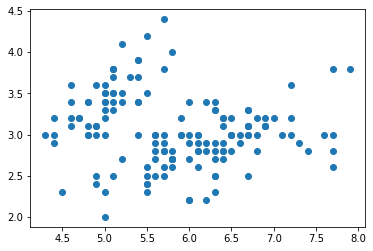

In [43]:
# Plot to figure out number of clusters visually
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

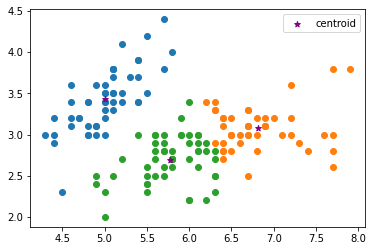

In [44]:
# There are 3 clusters
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
df['K Means Cluster'] = y_predict
cluster_centers = km.cluster_centers_

# Plot the cluster centers
df1 = df[df['K Means Cluster']==0]
df2 = df[df['K Means Cluster']==1]
df3 = df[df['K Means Cluster']==2]

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'])
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'])

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

C:\Users\Zuber\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


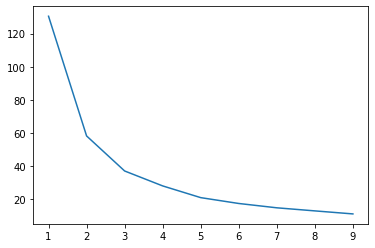

In [45]:
# Elbow Plot helps find k value
sum_of_squared_error = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sum_of_squared_error.append(km.inertia_)
    
plt.plot(k_range,sum_of_squared_error)

# PCA (Principal Component Analysis) 
* Helps reduce number of columns in a dataset
* Speeds up machine learning time for huge datasets
* There is a loss of variance after PCA

Text(0, 0.5, 'Second principle component')

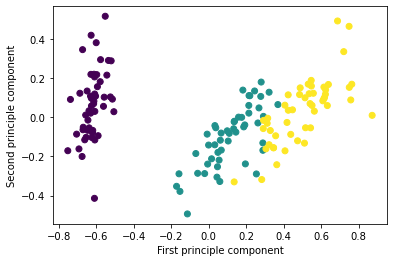

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

# x.shape
# x_pca.shape

plt.figure()
plt.scatter(x_pca[:,0],x_pca[:,1], c=li.target)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

# Save, Load a Machine Learning Model

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(model, 'model_joblib')
# pre_trained_model = joblib.load('model_joblib')
# pre_trained_model.predict(x_test)